In [115]:
import kcorrect
import numpy as np
import matplotlib.pyplot as plt
import plotting_tools as pt
%matplotlib inline
import itertools

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)

#array input form
# ukidds 
# 0 yPetroMag, 1
# 1 yPetroMagErr, 
# 2 hPetroMag, 
# 3 hPetroMagErr,
# 4 kPetroMag, 
# 5 kPetroMagErr,
# wise: 
# 6 w1mpro, 
# 7 w1sigmpro, 
# 8 w2mpro , 
# 9 w2sigmpro, 
# 10 w3mpro,
# 11 w3sigmpro, 
# 12 w4mpro, 
# 13 w4sigmpro,
# galex:
# 14 nuv_mag, 
# 15 nuv_magerr, 
# 16 fuv_mag, 
# 17 galex.fuv_magerr, 
# sdss: 
# 18 modelMag_u,
# 19 modelMag_g, 
# 20 modelMag_r, 
# 21 modelMag_i, 
# 22 modelMag_z, 
# 23 modelMagErr_u,               
# 24 modelMagErr_g ,
# 25 modelMagErr_r, 
# 26 modelMagErr_i, 
# 27 modelMagErr_z, 
# 28 petroMagr,  
# m.z

In [187]:
def perform_kcorrect(redshift,magnitudes,mag_ivars,filters=None):
    # remember to apply AB magnitude offsets
    maggies = pow(10,-0.4*np.array(magnitudes))
    maggies_ivar = pow(0.4*np.log(10)*maggies*np.array(mag_ivars),-2)
    c = kcorrect.fit_nonneg(redshift,maggies,maggies_ivar)
    rm = kcorrect.reconstruct_maggies(c)
    rm0 = kcorrect.reconstruct_maggies(c,redshift=0.)
    return -2.5*np.log10(rm[1:]/rm0[1:])   

In [117]:
galaxies = np.load('/home/calum/Documents/Mphys_data/mgs_multiwavelength/first_all_colours.npy')
print(galaxies.shape)

rlim_galaxies = np.array([row for row in galaxies if 0.2>row[-1]>0.004])
print(rlim_galaxies.shape)

(115684, 30)
(112196, 30)


In [144]:
x = []
y = []

kcorrect.load_templates()
kcorrect.load_filters()

for row in rlim_galaxies:
    # calculate kcorrections
    ktuple = perform_kcorrect(row[-1],row[18:23],row[23:28])
    # calculate absolute magnitudes
    x.append((row[28])-5*(np.log10(cosmo.luminosity_distance(row[-1]).to(u.pc).value/10)))
    # apply kcorrections
    y.append(row[18]-ktuple[0]-row[20]+ktuple[2])  
    
    

/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app


In [145]:
x = []
ny = []

for row in rlim_galaxies:
    # calculate kcorrections
    #ktuple = perform_kcorrect(row[-1],row[18:23],row[23:28])
    ktuple = [0,0,0,0,0]
    # calculate absolute magnitudes
    #x.append((row[28])-5*(np.log10(cosmo.luminosity_distance(row[-1]).to(u.pc).value/10)))
    # apply kcorrections
    ny.append(row[18]-ktuple[0]-row[20]+ktuple[2])  

In [146]:
plt.figure(figsize=(20,10))
pt.plot_hist(y,300,'kcorrect',set_bin_size=True,bin_size=0.1)
pt.plot_hist(ny,300,'no kcorrections',set_bin_size=True,bin_size=0.1)

plt.legend()
plt.xlim(0.5,3.5)

ValueError: cannot convert float NaN to integer

In [ ]:
galex_y = []

kcorrect.load_templates()
kcorrect.load_filters(f='galex_filters.dat')

for row in [row for row in rlim_galaxies if row[14] > 0  and row[16] > 0]:
    # calculate kcorrections
    ktuple = perform_kcorrect(row[-1],[row[16],row[14]],[row[17],row[15]])
    # apply kcorrections
    galex_y.append(row[16]-ktuple[0]-row[14]+ktuple[1]) 

In [ ]:
ugalex_y = []

for row in [row for row in rlim_galaxies if row[14] > 0  and row[16] > 0]:
    # calculate kcorrections
    ktuple = [0,0,0,0]
    # apply kcorrections
    ugalex_y.append(row[16]-ktuple[0]-row[14]+ktuple[1]) 

In [ ]:
plt.figure(figsize=(20,10))
pt.plot_hist(galex_y,100,'kcorrect')
pt.plot_hist(ugalex_y,100,'no kcorrections')

plt.legend()
#plt.xlim(16,25)
print(len(galex_y),len(ugalex_y))

In [129]:
# kcorrections for galex-sdss-ukidss in one go
galaxies = np.load('/home/calum/Documents/Mphys_data/mgs_multiwavelength/multiwavelength_magnitudes.npy')
print(galaxies.shape)

rlim_galaxies = np.array([row for row in galaxies if 0.12>row[-1]>0.004])
print(rlim_galaxies.shape)

(115684, 32)
(77402, 32)


In [130]:
#array input form
# 0 FUV
# 1 NUV
# 2 u
# 3 g
# 4 r
# 5 i
# 6 z
# 7 Y
# 8 J
# 9 H
# 10 K
# 11 W1
# 12 W2
# 13 W3
# 14 W4
# 15 FUV err
# 16 NUV err
# 17 u err
# 18 g err
# 19 r err
# 20 i err
# 21 z err
# 22 Y err
# 23 J err
# 24 H err
# 25 K err
# 26 W1 err
# 27 W2 err
# 28 W3 err
# 29 W4 err
# 30 petroMagr
# 31 redshift

In [188]:
# save the k-corrections

kcorrections = []

kcorrect.load_templates()
kcorrect.load_filters(f='multiwavelength_filters.dat')

for row in rlim_galaxies:
    # calculate kcorrections
    ktuple = perform_kcorrect(row[-1],row[:11],row[15:26])
    # store in array
    kcorrections.append(ktuple)

/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app


In [189]:
np.array(kcorrections).shape

(77402, 11)

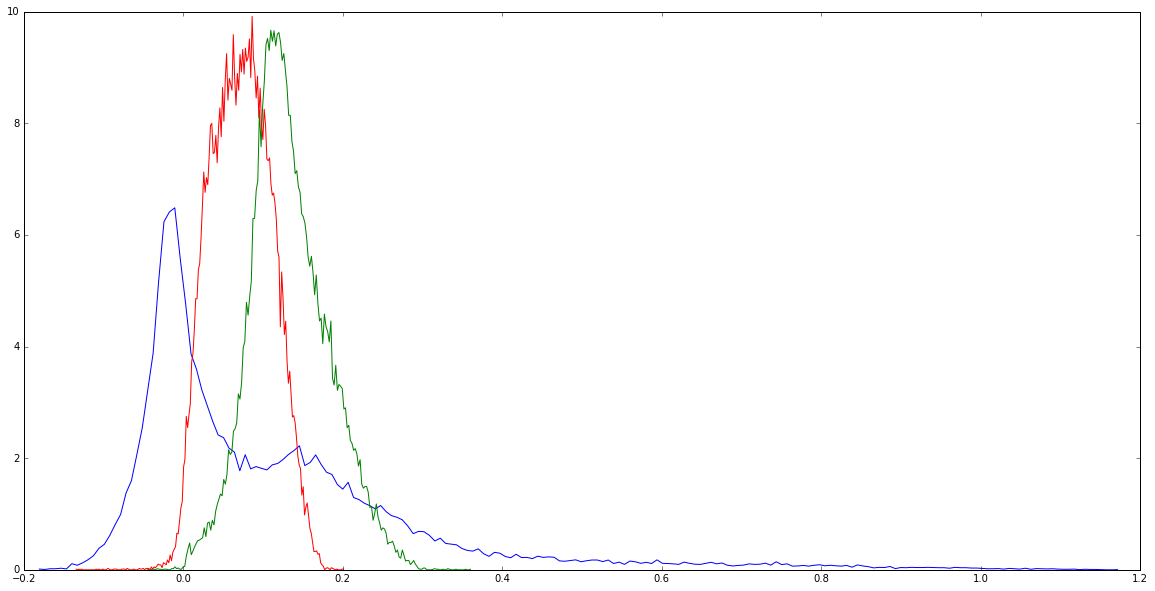

In [195]:
plt.figure(figsize=(20,10))
pt.plot_hist([row[0] for row in kcorrections if False == np.isnan(row[i])],200,'label')
pt.plot_hist([row[4] for row in kcorrections if False == np.isnan(row[i])],200,'label')
pt.plot_hist([row[6] for row in kcorrections if False == np.isnan(row[i])],200,'label')


In [191]:
galaxies_and_kcorrections = np.column_stack((rlim_galaxies,kcorrections))
galaxies_and_kcorrections.shape

(77402, 43)

In [201]:
y = []
ny = []

i = 1
j = 4

for row in galaxies_and_kcorrections:
    if False==(np.isnan(row[32])):
        ny.append(row[i]-row[j])
        y.append(row[i]-row[i+32]-row[j]+row[j+32]) 

47013 47013


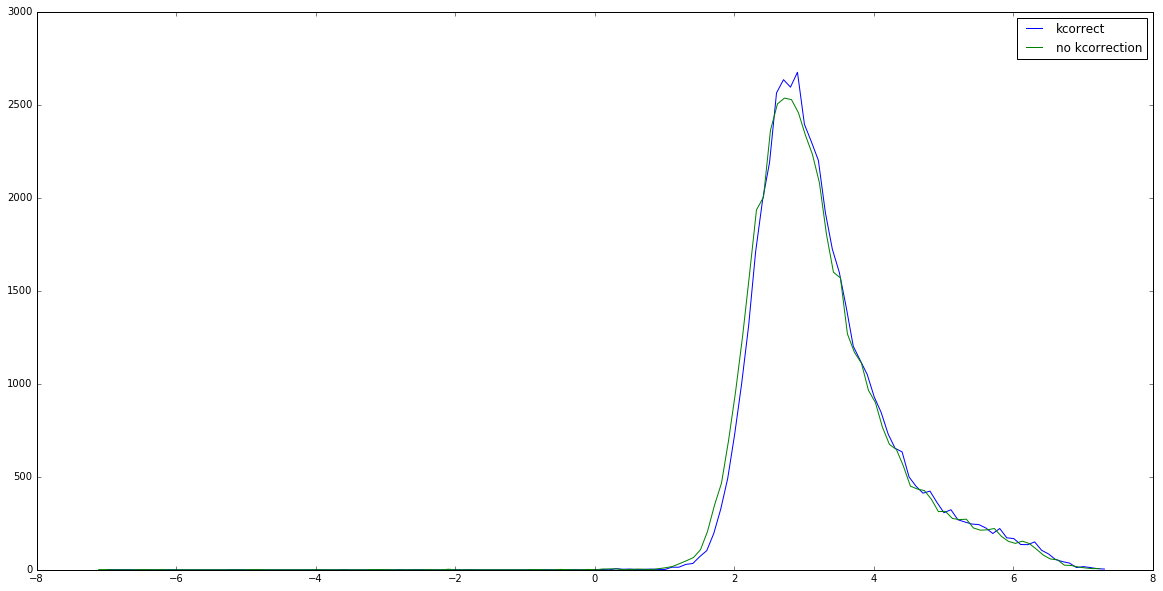

In [202]:
plt.figure(figsize=(20,10))
pt.plot_hist(y,300,'kcorrect',set_bin_size=True,bin_size=0.1,normed=False)
pt.plot_hist(ny,300,'no kcorrection',set_bin_size=True,bin_size=0.1,normed=False)

plt.legend()
print(len(y),len(ny))

In [177]:
kcorrect.load_filters(band_shift=0.1)